In [ ]:
'''This script performs exploratory data analysis on the train set'''

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

sns.set(font_scale=1.3)

In [2]:
train = pd.read_csv('../data/train.csv')
validation = pd.read_csv('../data/validation.csv')
test = pd.read_csv('../data/test.csv')

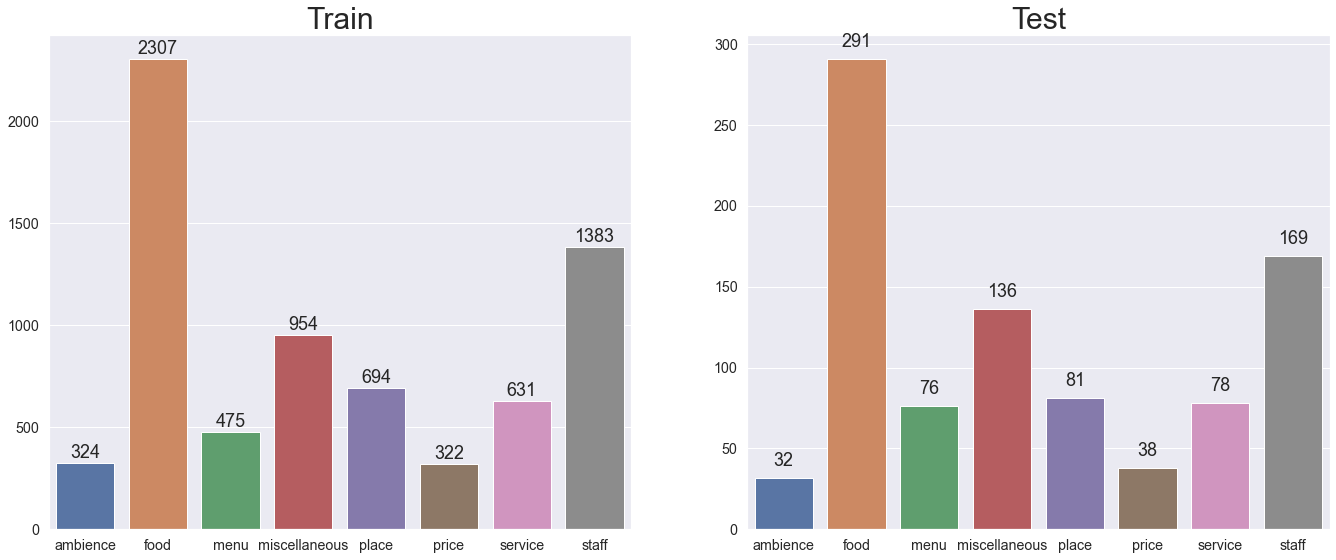

In [15]:
def aspects_dis_plot(data, fig, plot_index):
    # Number of samples for each aspect
    df = data.drop('review', axis=1).sum(axis=0)

    ax = fig.add_subplot(2, 4, plot_index+1)
    ax = sns.barplot(x=df.index, y=df.values)

    rects = ax.patches
    labels = df.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', 
                va='bottom', fontsize=18)
    return ax


fig = plt.figure(figsize=(48, 20))
ax1 = aspects_dis_plot(train, fig, 1)
ax1.set_title('Train', fontsize=30)
ax2 = aspects_dis_plot(test, fig, 2)
ax2.set_title('Test', fontsize=30)
plt.show()

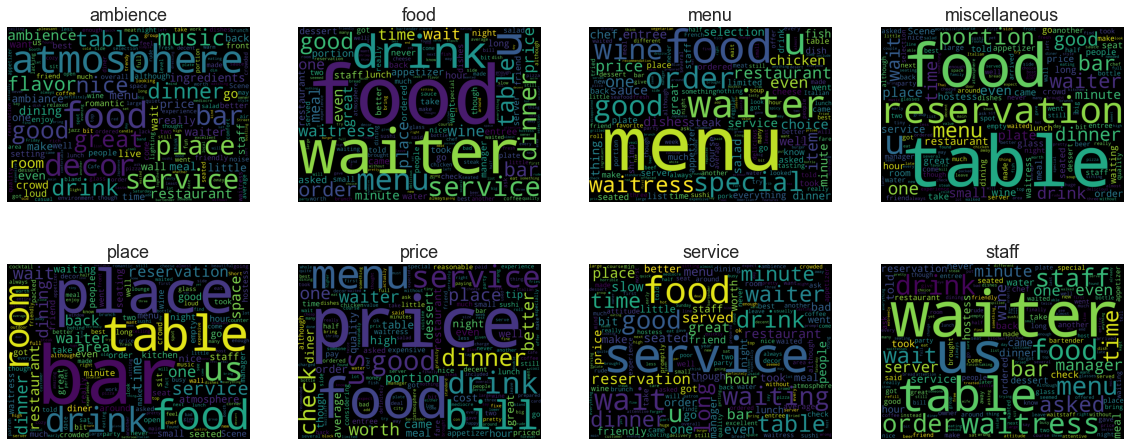

In [17]:
# WordCloud Visualization
fig = plt.figure(figsize=(20, 8))
aspects = list(train.drop('review', axis=1).columns)
for i, aspect in enumerate(aspects):
    subset = train[train[aspect] == 1]
    cld = WordCloud(stopwords=STOPWORDS, background_color='black',
                    collocations=False, width=2500,
                    height=1800).generate(" ".join(subset['review']))
    ax = fig.add_subplot(2, 4, i+1)
    ax.set_title(aspect, fontsize=18)
    ax.axis('off')
    ax.imshow(cld)